In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from kneed import KneeLocator
import sklearn.cluster as cluster
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [109]:
df=pd.read_csv("global_laptop_selling_data.csv", encoding= 'unicode_escape')

In [110]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [111]:
df.drop('laptop_ID',axis=1,inplace=True)

In [112]:
df2=df.copy()

In [113]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [115]:
df.info

<bound method DataFrame.info of      Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1298  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1299  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1300  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1301      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1302    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6

In [116]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 106
OpSys                 9
Weight              179
Price_euros         791
dtype: int64

In [117]:
df.shape

(1303, 12)

In [118]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [119]:
le = LabelEncoder()

In [120]:
for col in df2.columns:
    if df2[col].dtype == np.number:
        continue
    else:
        df2[col] = le.fit_transform(df2[col])

In [121]:
df2.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [122]:
df2.corr()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
Company,1.000000,0.067234,-0.007718,-0.085784,0.094772,0.044593,-0.008399,0.048086,0.030332,0.134290,-0.159906,0.140371
Product,0.067234,1.000000,0.065594,-0.218974,0.176393,0.143855,0.018305,0.088667,0.103462,0.120562,-0.204379,0.139289
TypeName,-0.007718,0.065594,1.000000,-0.077428,-0.175618,-0.128174,0.213988,0.019091,-0.197440,0.085223,-0.211832,-0.127313
Inches,-0.085784,-0.218974,-0.077428,1.000000,-0.247841,0.153041,-0.149706,-0.193382,0.198259,0.034528,0.866304,0.068197
ScreenResolution,0.094772,0.176393,-0.175618,-0.247841,1.000000,0.232751,0.019858,0.059042,0.161835,0.070360,-0.218135,0.331327
Cpu,0.044593,0.143855,-0.128174,0.153041,0.232751,1.000000,-0.077176,-0.013264,0.487391,0.125374,0.139861,0.529334
Ram,-0.008399,0.018305,0.213988,-0.149706,0.019858,-0.077176,1.000000,-0.248580,-0.133897,0.008627,-0.174577,-0.254032
Memory,0.048086,0.088667,0.019091,-0.193382,0.059042,-0.013264,-0.248580,1.000000,-0.015275,0.035574,-0.218299,0.185680
Gpu,0.030332,0.103462,-0.197440,0.198259,0.161835,0.487391,-0.133897,-0.015275,1.000000,0.104784,0.256843,0.440617
OpSys,0.134290,0.120562,0.085223,0.034528,0.070360,0.125374,0.008627,0.035574,0.104784,1.000000,-0.031506,0.288911


Text(0.5, 1.0, 'Rent Plot')

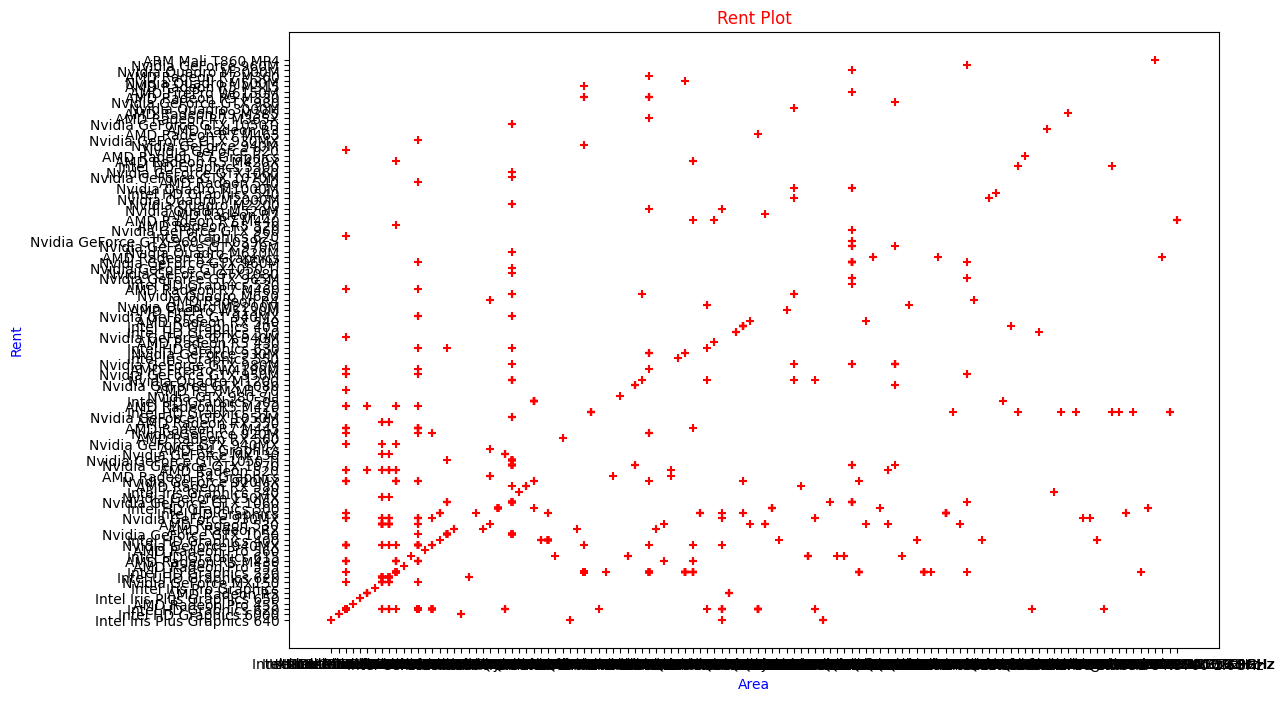

In [123]:
plt.figure(figsize=(12,8))
plt.scatter(df.Cpu, df.Gpu, marker="+", color="red")
plt.xlabel("Area", color="blue")
plt.ylabel("Rent", color="blue")
plt.title("Rent Plot", color="red")

In [124]:
mm = MinMaxScaler()

In [125]:
df2['Product'] = mm.fit_transform(df2[['Product']])

In [126]:
df2['Inches'] = mm.fit_transform(df2[['Inches']])

In [127]:
df2['ScreenResolution'] = mm.fit_transform(df2[['ScreenResolution']])

In [128]:
df2['Cpu'] = mm.fit_transform(df2[['Cpu']])

In [129]:
df2['Ram'] = mm.fit_transform(df2[['Ram']])

In [130]:
df2['Memory'] = mm.fit_transform(df2[['Memory']])

In [131]:
df2['Gpu'] = mm.fit_transform(df2[['Gpu']])

In [132]:
df2['OpSys'] = mm.fit_transform(df2[['OpSys']])

In [133]:
df2['Weight'] = mm.fit_transform(df2[['Weight']])

In [134]:
x = df2.drop('Price_euros',axis=1)

In [135]:
y = df2[['Price_euros']]

In [136]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,0.486224,4,0.385542,0.589744,0.555556,1.000,0.105263,0.533333,1.0,0.213483
1,1,0.487844,4,0.385542,0.025641,0.538462,1.000,0.052632,0.476190,1.0,0.196629
2,7,0.081037,3,0.662651,0.205128,0.632479,1.000,0.421053,0.495238,0.5,0.415730
3,1,0.486224,4,0.638554,0.641026,0.726496,0.125,0.763158,0.076190,1.0,0.398876
4,1,0.486224,4,0.385542,0.589744,0.572650,1.000,0.421053,0.542857,1.0,0.213483


In [137]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [138]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=60)

In [139]:
xtrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1122,7,0.176661,3,0.469880,0.205128,0.581197,1.000,0.421053,0.438095,0.875,0.247191
606,16,0.730956,3,0.662651,0.384615,0.760684,1.000,0.421053,0.438095,0.625,0.634831
528,4,0.387358,3,0.662651,0.205128,0.632479,0.625,0.684211,0.219048,0.625,0.679775
1060,7,0.588331,3,0.662651,0.205128,0.829060,1.000,0.421053,0.495238,0.625,0.505618
1052,4,0.403566,0,0.662651,0.333333,0.649573,1.000,0.421053,0.495238,0.625,0.679775


In [140]:
ytrain.head()

,Price_euros
1122,1513.0
606,1399.0
528,585.0
1060,1070.0
1052,1094.0


In [141]:
xtrain.shape

(912, 11)

KNN Regression

In [142]:
ln = LinearRegression()

In [143]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [144]:
predKNNR = ln.predict(xtest)
predKNNR

array([[ 790.99679268],
       [ 976.51432188],
       [1554.50014946],
       [1339.21673096],
       [1189.62434862],
       [ 568.48454381],
       [1788.83227691],
       [1650.17948064],
       [1637.44083524],
       [1289.45796024],
       [2481.78043706],
       [1289.46159403],
       [1326.12177277],
       [1138.32188862],
       [1386.83569054],
       [ 540.37910431],
       [ 437.28245036],
       [1403.43036763],
       [1385.59908786],
       [1972.06756993],
       [ 185.72250313],
       [1764.88886488],
       [1204.95119772],
       [ 906.7334122 ],
       [1305.38749601],
       [1587.63794841],
       [ 248.72422624],
       [1501.09515275],
       [ 761.63988615],
       [1043.18958544],
       [1286.62775765],
       [ 974.671127  ],
       [1093.01595341],
       [1172.25917102],
       [ 952.3705872 ],
       [ 997.09379644],
       [ 688.35225533],
       [ 782.95932239],
       [ 396.876357  ],
       [ 569.30637499],
       [ 851.010387  ],
       [ 238.615

In [145]:
accuracyKNNR = r2_score(ytest,predKNNR)
accuracyKNNR

0.39485068010189206

In [146]:
maeKNNR = mean_absolute_error(ytest,predKNNR)
maeKNNR

385.2636434818504

In [147]:
mseKNNR = mean_squared_error(ytest,predKNNR)
mseKNNR

301236.4960277478

Logistic Regression

In [148]:
df3=df.copy()

In [149]:
for col in df3.columns:
    if df3[col].dtype == np.number:
        continue
    else:
        df3[col] = le.fit_transform(df3[col])

In [150]:
df3.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [151]:
x = df2.drop('Price_euros',axis=1)

In [152]:
y = df2[['Price_euros']]

In [153]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=70)

In [154]:
xtrain.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
440,10,0.335494,3,0.867470,0.051282,0.068376,1.000,0.263158,0.133333,0.625,0.808989
259,10,0.949757,0,0.662651,0.333333,0.871795,1.000,0.763158,0.695238,0.625,0.831461
379,0,0.097245,3,0.662651,0.205128,0.871795,1.000,0.263158,0.676190,0.250,0.696629
288,10,0.471637,1,0.662651,0.384615,0.871795,0.125,0.473684,0.685714,0.625,0.724719
996,7,0.677472,4,0.385542,0.333333,0.829060,1.000,0.421053,0.495238,0.625,0.067416


In [155]:
ytrain.head()

,Price_euros
440,519.0
259,1699.0
379,846.0
288,1179.0
996,1349.0


In [156]:
reg = LogisticRegression()

In [157]:
reg.fit(xtrain,ytrain)

ValueError: Unknown label type: 'continuous'

In [ ]:
m = reg.coef_
m

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
c = reg.intercept_
c

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [ ]:
predLo = reg.predict(xtest)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
accuracyLo = reg.score(xtest,ytest)
accuracyLo

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
maeLo = mean_absolute_error(ytest,predLo)
maeLo

368.8704706367237

In [ ]:
mseLo = mean_squared_error(ytest,predLo)
mseLo

NameError: name 'predLo' is not defined

Linear Regression

In [ ]:
reg = LinearRegression()

In [ ]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=70)

In [ ]:
reg.fit(xtrain,ytrain)

ValueError: Unknown label type: 'continuous'

In [ ]:
m=reg.coef_
m

array([[ 6.36883860e+00,  2.22639138e+01, -4.45192979e-01,
         5.27521808e+02,  6.78888024e+02,  1.17522630e+03,
        -3.89207406e+02,  4.68714876e+02,  6.54505495e+02,
         1.19903860e+03, -3.22853325e+02]])

In [ ]:
c=reg.intercept_
c

array([-980.0100578])

In [ ]:
reg.predict(xtest)

array([[ 620.29221641],
       [1475.88820691],
       [1250.29098996],
       [ 868.91706654],
       [ 729.94432983],
       [ 855.49331284],
       [ 573.99853397],
       [1455.12315869],
       [1348.53270317],
       [ 601.19560939],
       [1143.76761772],
       [ 742.9813433 ],
       [1153.913587  ],
       [1719.40854467],
       [1083.90008325],
       [ 776.67630157],
       [1171.55217796],
       [1386.48227133],
       [ 551.31763976],
       [1310.1242879 ],
       [1006.61515339],
       [ 756.80005885],
       [ 639.79007523],
       [ 847.7793609 ],
       [ -27.43079677],
       [ 806.58470397],
       [1017.11435663],
       [1085.90103567],
       [ 891.38934441],
       [1697.09513096],
       [1060.85059266],
       [1365.65383057],
       [ 944.55032052],
       [1035.20501977],
       [ 912.90655242],
       [1148.14060181],
       [1281.73785394],
       [ 902.86781446],
       [1108.08979548],
       [ 709.2666108 ],
       [1488.77878068],
       [ 994.363

In [ ]:
predLi = reg.predict(xtest)
predLi

array([[ 620.29221641],
       [1475.88820691],
       [1250.29098996],
       [ 868.91706654],
       [ 729.94432983],
       [ 855.49331284],
       [ 573.99853397],
       [1455.12315869],
       [1348.53270317],
       [ 601.19560939],
       [1143.76761772],
       [ 742.9813433 ],
       [1153.913587  ],
       [1719.40854467],
       [1083.90008325],
       [ 776.67630157],
       [1171.55217796],
       [1386.48227133],
       [ 551.31763976],
       [1310.1242879 ],
       [1006.61515339],
       [ 756.80005885],
       [ 639.79007523],
       [ 847.7793609 ],
       [ -27.43079677],
       [ 806.58470397],
       [1017.11435663],
       [1085.90103567],
       [ 891.38934441],
       [1697.09513096],
       [1060.85059266],
       [1365.65383057],
       [ 944.55032052],
       [1035.20501977],
       [ 912.90655242],
       [1148.14060181],
       [1281.73785394],
       [ 902.86781446],
       [1108.08979548],
       [ 709.2666108 ],
       [1488.77878068],
       [ 994.363

In [ ]:
accuracyLi = r2_score(ytest,predLi)
accuracyLi

0.4151082209005571

In [ ]:
mse = mean_squared_error(ytest,predLi)
mse

273437.3902564091

In [ ]:
mae = mean_absolute_error(ytest,predLi)
mae

368.8704706367237

In [ ]:
data = {'Name':['Logistic_Regression','KNN_Regression','Linear_Regression'],
         'Data':[accuracyLo,accuracyKNNR,accuracyLi]}
barplot = pd.DataFrame(data=data)
barplot.head()

,Name,Data
0,Logistic_Regression,0.415108
1,KNN_Regression,0.394851
2,Linear_Regression,0.415108


<Axes: xlabel='Data', ylabel='Name'>

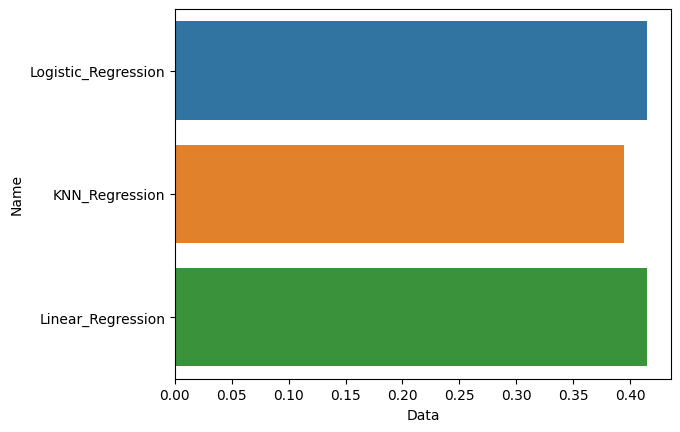

In [ ]:
sns.barplot(x='Data',y='Name',data=barplot)